<a href="https://colab.research.google.com/github/Shivamb2203/PRODIGY_DS_03/blob/main/DS_Task_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Load the data with the correct delimiter
file_path = 'bank-full.csv'
data = pd.read_csv(file_path, delimiter=';', encoding='ascii')

In [ ]:
# Display the head of the dataframe
print(data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


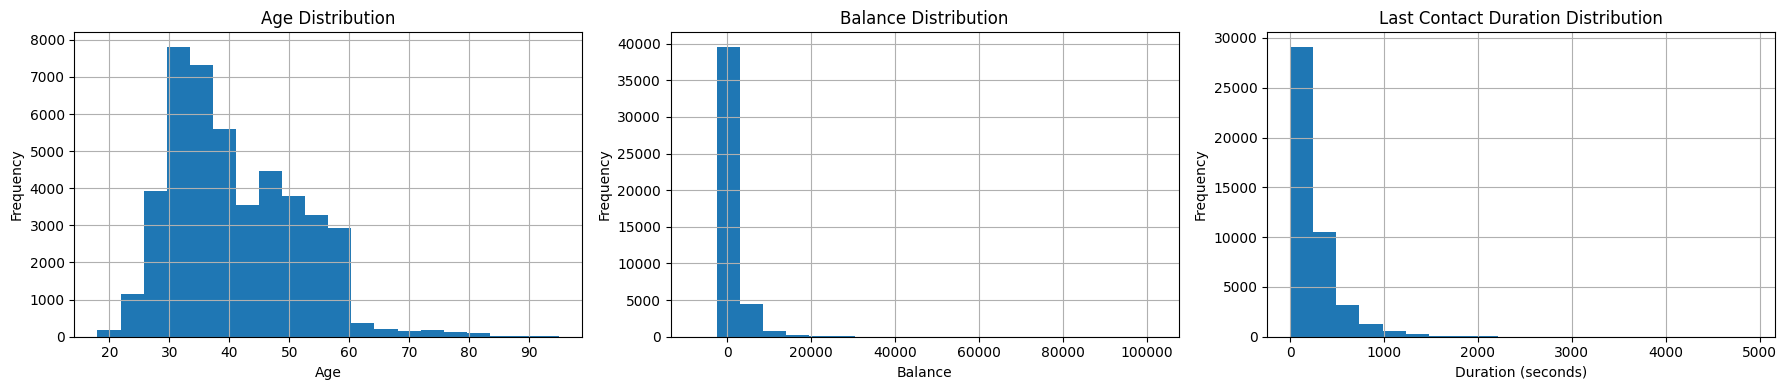

In [ ]:
# Plotting distributions of a few numerical columns
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
data['age'].hist(ax=ax[0], bins=20)
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

data['balance'].hist(ax=ax[1], bins=20)
ax[1].set_title('Balance Distribution')
ax[1].set_xlabel('Balance')
ax[1].set_ylabel('Frequency')

data['duration'].hist(ax=ax[2], bins=20)
ax[2].set_title('Last Contact Duration Distribution')
ax[2].set_xlabel('Duration (seconds)')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [ ]:
# Split the data into features and target
X = data.drop('y', axis=1)
y = data['y']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Classification Report:\n', report)
print('Accuracy:', accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043

Accuracy: 0.8740462235983634
